# 1.  What are the 10 most played tracks and artists? 🎶

## Top 10 Artists

In [32]:
'''
I used 2 approaches to answer this question- top 20 artists by appearance count 
and top 20 artists by minutes played
'''
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')


# set font to Microsoft YaHei to show Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

#### Find top 10 artists by appearances

In [33]:
top_artists = music_tracks_df['artist_name'].value_counts().head(10)
print(top_artists)

artist_name
Hebe Tien      14441
S.H.E          12149
JJ Lin         11464
Yoga Lin        8739
Leehom Wang     8312
許嵩              6570
G.E.M.          5692
Jay Chou        5590
sodagreen       5478
OneRepublic     5259
Name: count, dtype: int64


#### Find top 10 artists by hours played

In [34]:
# group by artist_name and sum the minutes played
artist_played_hours=(
    music_tracks_df.groupby('artist_name')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    /60 #convert to hours
)

# find top 10 artists
top_10_artists = artist_played_hours.round(0).head(10)
print(top_10_artists)


artist_name
Hebe Tien      612.0
JJ Lin         603.0
S.H.E          455.0
Yoga Lin       388.0
Leehom Wang    318.0
許嵩             269.0
G.E.M.         249.0
Jay Chou       235.0
路嘉欣            197.0
Joker Xue      194.0
Name: minutes_played, dtype: float64


#### Visualize top 10 Artists

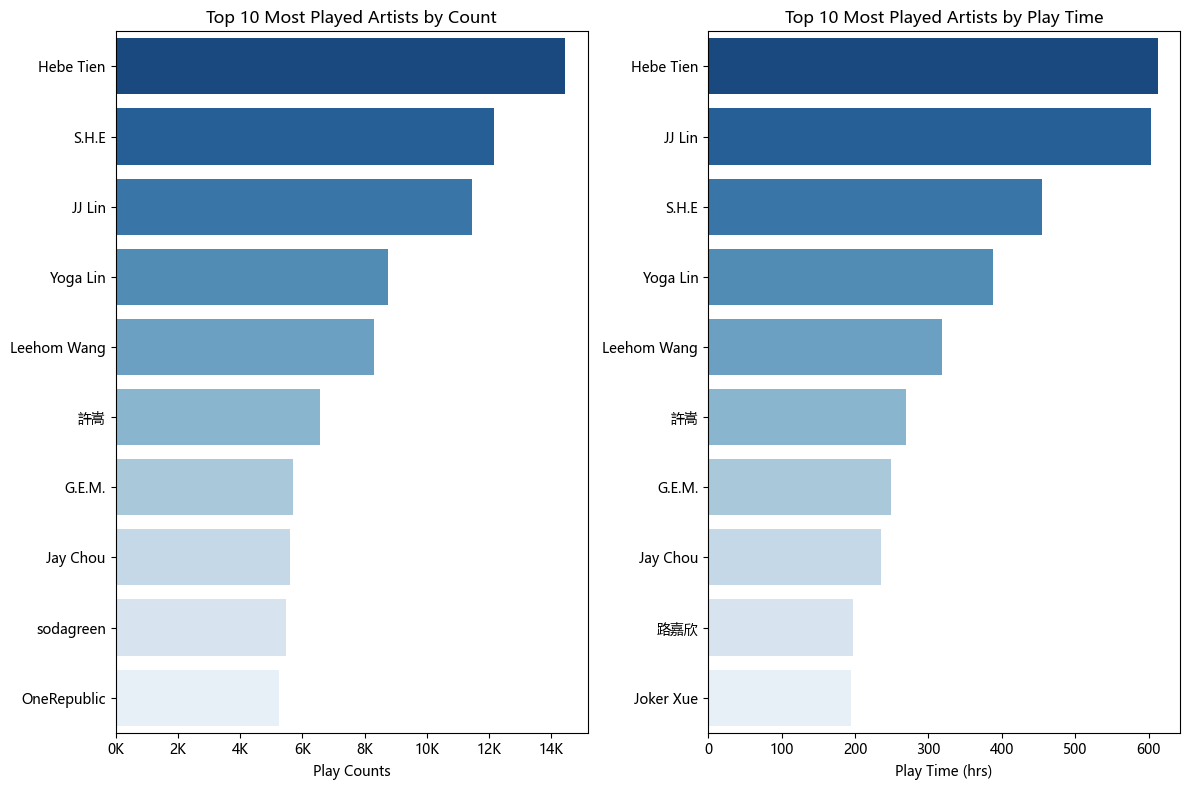

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,8))

#plot first chart
sns.barplot(
    x=top_artists.values,
    y=top_artists.index,
    ax=ax[0],
    palette=sns.color_palette('Blues_r',len(top_artists)),
    hue=top_artists.index # #assign y variable to hue
)

ax[0].set_title('Top 10 Most Played Artists by Count')
ax[0].set_ylabel('')
ax[0].set_xlabel('Play Counts')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

#plot second chart
sns.barplot(
    x=top_10_artists.values,
    y=top_10_artists.index,
    ax=ax[1],
    palette=sns.color_palette('Blues_r',len(top_10_artists)),
    hue=top_10_artists.index
)

ax[1].set_title('Top 10 Most Played Artists by Play Time')
ax[1].set_ylabel('')
ax[1].set_xlabel('Play Time (hrs)')

plt.tight_layout()
plt.show()

#### Visualize top 10 artists over time

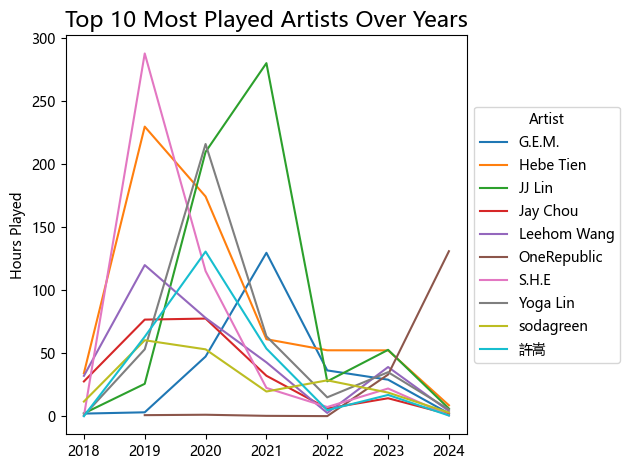

In [56]:
top_artists = music_tracks_df['artist_name'].value_counts().head(10).index.tolist()

# calculate total minutes played for all artists in each year
# group by artist_name and years, summing minutes played
grouped_data =(
    music_tracks_df.groupby(['artist_name','year'])['minutes_played']
    .sum()
    .reset_index()
)

# convert minutes to hours
grouped_data['hours_played']=grouped_data['minutes_played']/60

# only include top 10 artists by count in the grouped data
filtered_data=grouped_data[grouped_data['artist_name'].isin(top_artists)]


# create line chart

sns.lineplot(
    data=filtered_data,
    x='year',
    y='hours_played',
    hue='artist_name',
    palette='tab10',
)

# move legend to right
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title='Artist')

# Add titles and labels
plt.ylabel('Hours Played')
plt.xlabel('')
plt.title('Top 10 Most Played Artists Over Years', fontsize=16)

plt.tight_layout()
plt.show()


## Top 10 Podcasts

#### Find top 10 most played shows by count

In [106]:
top_show=podcast_episodes_df['show_name'].value_counts().head(10)
print(top_show)

show_name
童話裡都是騙人的                                1937
時間的女兒：八卦歷史                              1673
阿路八                                      999
我在案發現場                                   673
善嵐慶女                                     509
吃史 Eat History                           436
宮說宮有理－國立故宮博物院 National Palace Museum     426
愚樂百昏百                                    391
阿善師鑑識實錄                                  335
劉軒的How to人生學                             315
Name: count, dtype: int64


#### Find top 10 most played shows by play time

In [107]:
# group by show_name and sum the minutes played
show_played_hours=(
    podcast_episodes_df.groupby('show_name')['minutes_played']
    .sum()
    .sort_values(ascending=False)
    /60
)

top_played_shows=show_played_hours.round(0).head(10)
top_played_shows

show_name
童話裡都是騙人的                                       1491.0
時間的女兒：八卦歷史                                      985.0
阿路八                                             646.0
我在案發現場                                          371.0
善嵐慶女                                            285.0
愚樂百昏百                                           231.0
宮說宮有理－國立故宮博物院 National Palace Museum            164.0
馬力歐陪你喝一杯                                        127.0
阿善師鑑識實錄                                         121.0
別叫我大使夫人 On the Right Side of the Ambassador     121.0
Name: minutes_played, dtype: float64

#### Visualize top 10 Shows

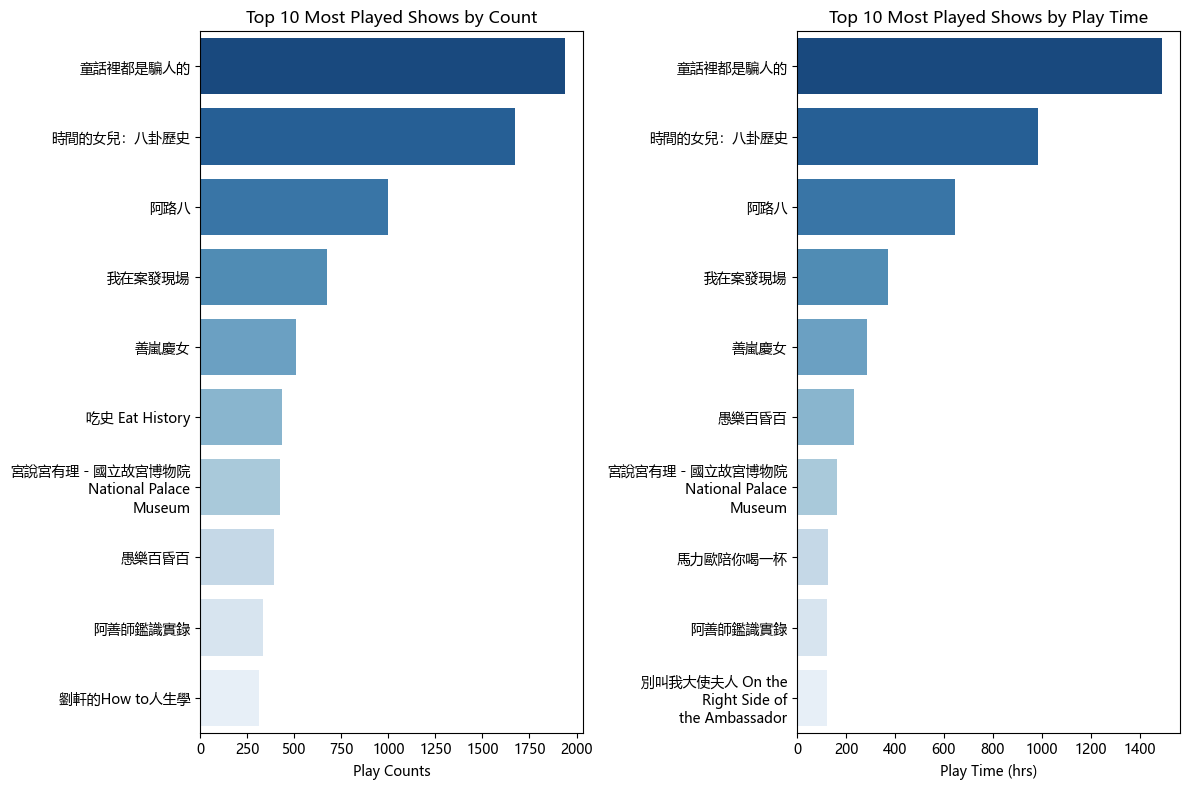

In [108]:
import textwrap
fig, ax = plt.subplots(1,2,figsize=(12,8))

# plot first chart
sns.barplot(
    x=top_show.values,
    y=top_show.index,
    ax=ax[0],
    palette=sns.color_palette('Blues_r',len(top_show)),
    hue=top_show.index
)

ax[0].set_title('Top 10 Most Played Shows by Count')
ax[0].set_ylabel('')
ax[0].set_xlabel('Play Counts')

#set tick positions
ax[0].set_yticks(range(len(top_show.index)))
# wrap text for y axis label
ax[0].set_yticklabels(['\n'.join(textwrap.wrap(label, 15)) for label in top_show.index])

# plot second chart
sns.barplot(
    x=top_played_shows.values,
    y=top_played_shows.index,
    ax=ax[1],
    palette=sns.color_palette('Blues_r',len(top_played_shows)),
    hue=top_played_shows.index
)

ax[1].set_title('Top 10 Most Played Shows by Play Time')
ax[1].set_ylabel('')
ax[1].set_xlabel('Play Time (hrs)')
ax[1].set_yticks(range(len(top_played_shows.index)))
ax[1].set_yticklabels(['\n'.join(textwrap.wrap(label,15)) for label in top_played_shows.index])

plt.tight_layout()
plt.show()

#### Visualize top 10 podcasts over time

In [109]:
top_show=podcast_episodes_df['show_name'].value_counts().head(10).index.tolist()

grouped_podcast_data=(
    podcast_episodes_df.groupby(['show_name','year'])['minutes_played']
    .sum()
    .reset_index()
)

# convert minutes to hours
grouped_podcast_data['hours_played']=grouped_podcast_data['minutes_played']/60

# only include top 10 podcast shows in the grouped podcast data
filtered_podcast_data=grouped_podcast_data[grouped_podcast_data['show_name'].isin(top_show)]

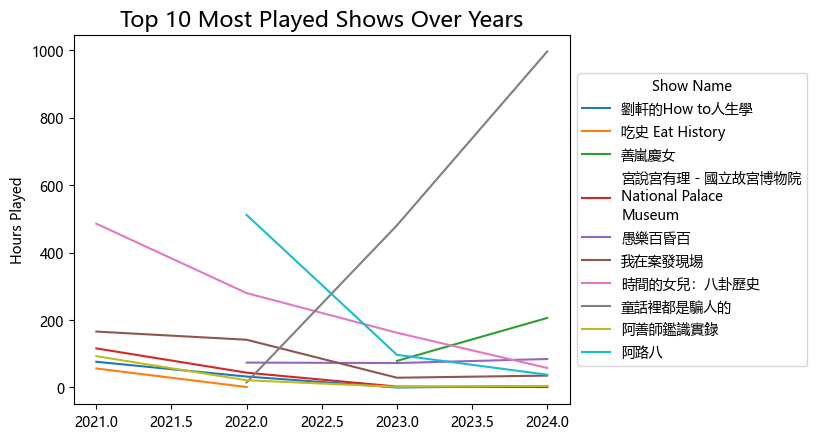

In [112]:
# create line chart
sns.lineplot(
    data=filtered_podcast_data,
    x='year',
    y='hours_played',
    palette='tab10',
    hue='show_name'
)

# move legend to right
legend = plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title='Show Name')

# wrap text in legend
for text in legend.texts:
    text.set_text('\n'.join(textwrap.wrap(text.get_text(),15)))
plt.ylabel('Hours Played')
plt.xlabel('')
plt.title('Top 10 Most Played Shows Over Years', fontsize=16)

plt.show()

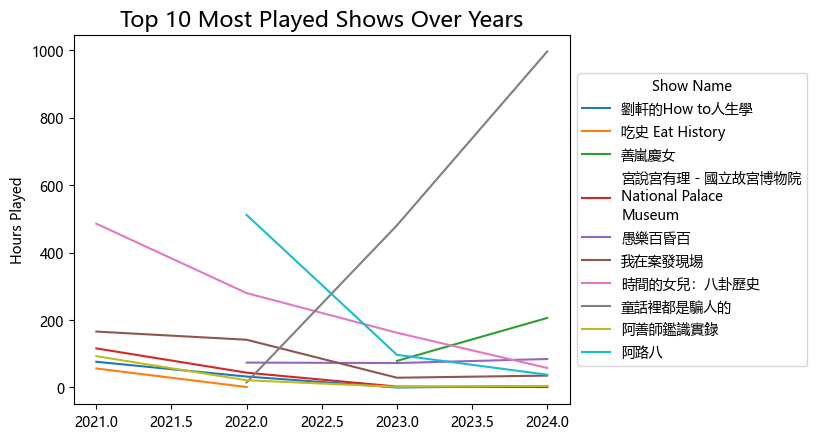

In [ ]:
import textwrap

# Create line chart
sns.lineplot(
    data=filtered_podcast_data,
    x='year',
    y='hours_played',
    palette='tab10',
    hue='show_name'
)

# Move legend to the right
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Show Name')

# Wrap text directly using textwrap
for text in legend.texts:
    text.set_text('\n'.join(textwrap.wrap(text.get_text(), 15)))  

plt.ylabel('Hours Played')
plt.xlabel('')
plt.title('Top 10 Most Played Shows Over Years', fontsize=16)

plt.show()
